In [56]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [58]:
data_dir = "data/raw-img" 

In [59]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float16),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [60]:
full_dataset = ImageFolder(root=data_dir, transform=transform)
class_names = full_dataset.classes

In [61]:
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size


In [62]:
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

In [63]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, pin_memory=True)

# val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)


In [64]:
train_labels = [full_dataset.targets[i] for i in train_dataset.indices]
train_distr = dict(sorted(Counter(train_labels).items()))
train_distr

{0: 1488,
 1: 1143,
 2: 2194,
 3: 1303,
 4: 3399,
 5: 1000,
 6: 1854,
 7: 1272,
 8: 3370,
 9: 1302}

In [65]:
val_labels = [full_dataset.targets[i] for i in val_dataset.indices]
val_distr = dict(sorted(Counter(val_labels).items()))
val_distr

{0: 321,
 1: 259,
 2: 472,
 3: 259,
 4: 743,
 5: 221,
 6: 387,
 7: 274,
 8: 719,
 9: 271}

In [66]:
test_labels = [full_dataset.targets[i] for i in test_dataset.indices]
test_distr = dict(sorted(Counter(test_labels).items()))
test_distr

{0: 303,
 1: 266,
 2: 432,
 3: 304,
 4: 721,
 5: 225,
 6: 382,
 7: 274,
 8: 732,
 9: 289}

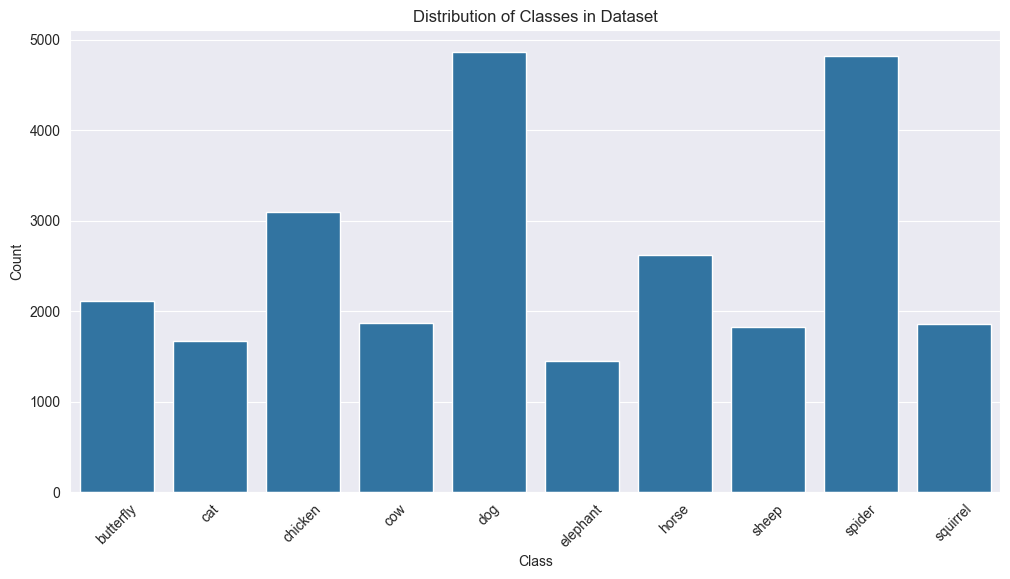

In [67]:
class_counts = {}
for _, label in full_dataset.samples:
    class_name = full_dataset.classes[label]
    class_counts[class_name] = class_counts.get(class_name, 0) + 1


class_names = list(class_counts.keys())
counts = list(class_counts.values())


plt.figure(figsize=(12, 6))
sns.barplot(x=class_names, y=counts)
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Classes in Dataset")
plt.show()

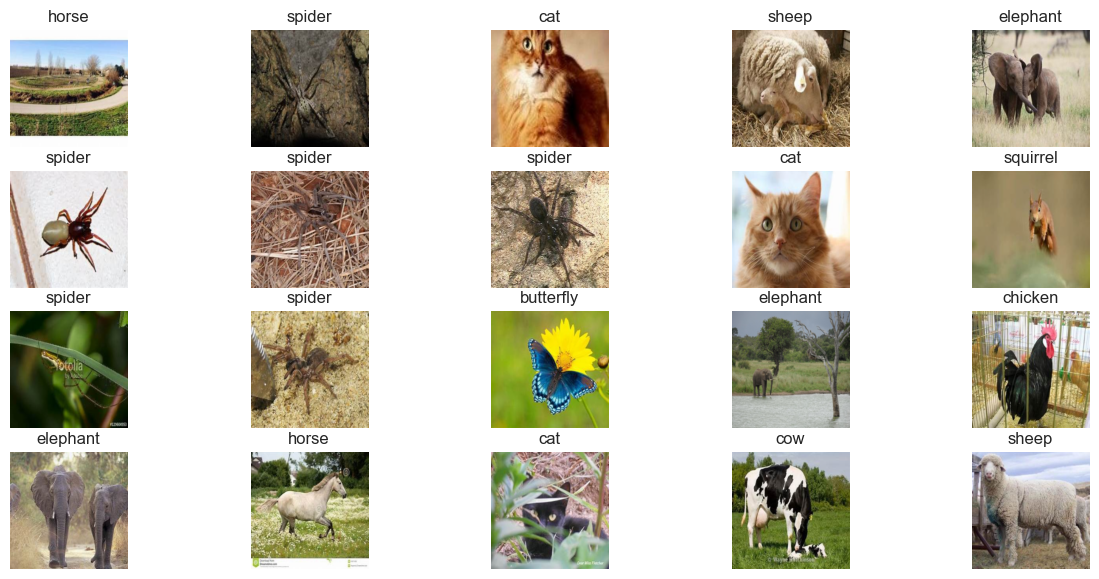

In [68]:
def show_images(dataset, num_images=20):
    rows = 4
    cols = num_images // rows
    fig, axes = plt.subplots(rows, cols, figsize=(15, 7))
    for i in range(num_images):
        row, col = divmod(i, cols)
        image, label = dataset[i]
        image = image.permute(1, 2, 0).to(dtype=torch.float32) * 0.5 + 0.5 
        axes[row, col].imshow(image.cpu().numpy())
        axes[row, col].set_title(class_names[label])
        axes[row, col].axis("off")
    plt.show()

show_images(train_dataset, 20)